# Bibliotecas

In [0]:
import pandas as pd #análise de dados em tabelas
import numpy as np #análise de números
import seaborn as sb #análise em gráficos

# Cardiovascular Machine Learning Classification Model
With categorical features

In [0]:
cvd = pd.read_csv('http://bit.ly/cardiodados')

In [0]:
cvd.columns.tolist()

['patientID',
 'age',
 'htn',
 'treat',
 'smoking',
 'race',
 't2d',
 'gender',
 'numAge',
 'bmi',
 'tchol',
 'sbp',
 'cvd']

In [0]:
cvd[['htn', 'treat']]

,htn,treat
0,N,N
1,N,N
2,Y,Y
3,N,N
4,N,N
5,N,N
6,Y,N
7,N,N
8,N,N
9,Y,Y


In [0]:
cvd_Shtn = cvd[cvd['htn'] == 'Y']
cvd_Nhtn = cvd[cvd['htn'] == 'N']

In [0]:
total_cvd_htnS = len(cvd_Shtn)
total_cvd_htnN = len(cvd_Nhtn)
total_cvd_htnT = len(cvd_Shtn) + len(cvd_Nhtn)

In [0]:
total_cvd_htnS / total_cvd_htnT

0.28621950098946

In [0]:
cvd.groupby('htn')['treat'].value_counts()

htn  treat
N    N        318491
Y    Y         75139
     N         52573
Name: treat, dtype: int64

In [0]:
cvd['htn'] == 'Y'

0         False
1         False
2          True
3         False
4         False
5         False
6          True
7         False
8         False
9          True
10         True
11        False
12        False
13        False
14        False
15         True
16        False
17        False
18        False
19        False
20         True
21         True
22        False
23        False
24        False
25         True
26         True
27        False
28        False
29        False
          ...  
446173     True
446174    False
446175    False
446176    False
446177    False
446178     True
446179    False
446180    False
446181    False
446182    False
446183     True
446184    False
446185    False
446186     True
446187    False
446188     True
446189    False
446190    False
446191    False
446192    False
446193     True
446194    False
446195    False
446196    False
446197    False
446198     True
446199    False
446200    False
446201     True
446202    False
Name: htn, Length: 44620

In [0]:
cvd.head()

,patientID,age,htn,treat,smoking,race,t2d,gender,numAge,bmi,tchol,sbp,cvd
0,HHUID00519967,70-90,N,N,N,White,N,M,83,17,156,113,N
1,HHUID00379006,40-55,N,N,N,White,N,M,44,23,167,126,N
2,HHUID00357476,55-70,Y,Y,N,White,N,M,62,16,214,175,N
3,HHUID00862369,40-55,N,N,N,White,N,M,42,22,158,102,N
4,HHUID00481496,55-70,N,N,N,White,N,M,63,24,244,132,N


In [0]:
cvd.shape

(446203, 13)

In [0]:
cvd_col_imc = cvd[(cvd['tchol'] > 200) & (cvd['bmi'] > 30)]

In [0]:
problema = cvd[(cvd['htn'] == 'Y') | (cvd['t2d'] =='Y') | (cvd['numAge'] > 35)]

In [0]:
problema.to_csv('e.csv')

## .loc

In [0]:

cvd.loc[cvd['htn'] == 'N', 'htn_bin'] = 0
cvd['htn_bin'].value_counts()

0.0    318491
1.0    127712
Name: htn_bin, dtype: int64

In [0]:
cvd['race'].value_counts()

White         335201
Asian/PI       84840
Black/AfAm     23722
AmInd           2440
Name: race, dtype: int64

In [0]:
cvd.loc[cvd['race'] == 'White', 'race_W'] = 1
cvd.loc[cvd['race'] != 'White', 'race_W'] = 0

cvd.loc[cvd['race'] == 'Asian/PI', 'race_As'] = 1
cvd.loc[cvd['race'] != 'Asian/PI', 'race_As'] = 0

cvd.loc[cvd['race'] == 'Black/AfAm', 'race_Af'] = 1
cvd.loc[cvd['race'] != 'Black/AfAm', 'race_Af'] = 0

cvd.loc[cvd['race'] == 'AmInd', 'race_Am'] = 1
cvd.loc[cvd['race'] != 'AmInd', 'race_Am'] = 0

cvd['race_As'].value_counts()

0.0    361363
1.0     84840
Name: race_As, dtype: int64

In [0]:
cvd.loc[cvd['bmi'] > 30, 'bmi_bin'] = 1
cvd.loc[cvd['bmi'] <= 30, 'bmi_bin'] = 0

In [0]:
cvd.head()

,patientID,age,htn,treat,smoking,race,t2d,gender,numAge,bmi,tchol,sbp,cvd,htn_bin,race_W,race_As,race_Af,race_Am,bmi_bin
0,HHUID00519967,70-90,N,N,N,White,N,M,83,17,156,113,N,0.0,1.0,0.0,0.0,0.0,0.0
1,HHUID00379006,40-55,N,N,N,White,N,M,44,23,167,126,N,0.0,1.0,0.0,0.0,0.0,0.0
2,HHUID00357476,55-70,Y,Y,N,White,N,M,62,16,214,175,N,1.0,1.0,0.0,0.0,0.0,0.0
3,HHUID00862369,40-55,N,N,N,White,N,M,42,22,158,102,N,0.0,1.0,0.0,0.0,0.0,0.0
4,HHUID00481496,55-70,N,N,N,White,N,M,63,24,244,132,N,0.0,1.0,0.0,0.0,0.0,0.0


### Explore Data

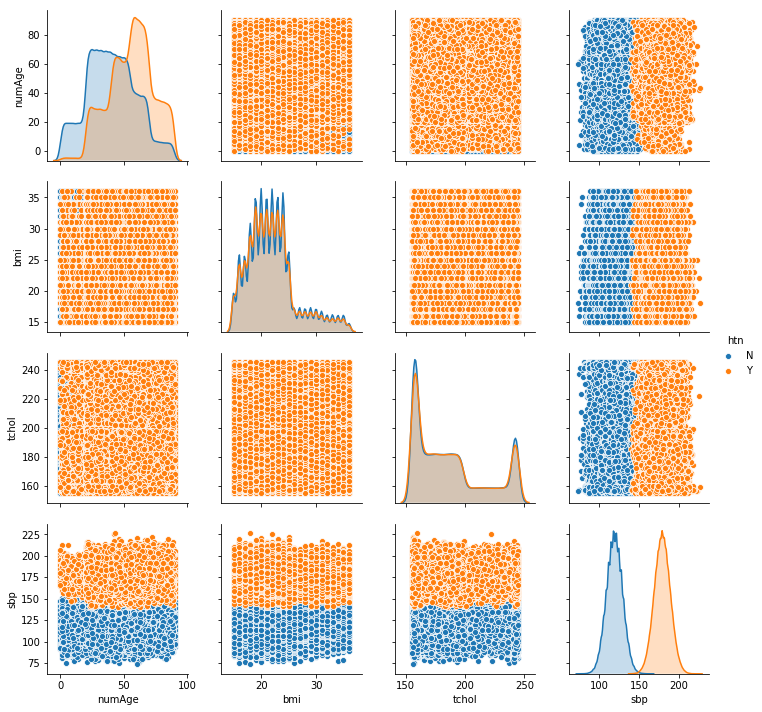

In [0]:
import seaborn as sns
sns.pairplot(cvd, hue='htn')

### Transform Data

In [0]:
def transform(valor):
  if valor == 'Y':
    return 1
  else:
    return 0

In [0]:
def gender(valor):
  if valor == 'F':
    return 1
  else:
    return 0

In [0]:
cvd['htn'] = cvd['htn'].map(transform) 
cvd['treat'] = cvd['treat'].map(transform) 
cvd['smoking'] = cvd['smoking'].map(transform) 
cvd['t2d'] = cvd['t2d'].map(transform) 
cvd['cvd'] = cvd['cvd'].map(transform) 
cvd['gender'] = cvd['gender'].map(gender) 

In [0]:
cvd.race.value_counts()

White         335201
Asian/PI       84840
Black/AfAm     23722
AmInd           2440
Name: race, dtype: int64

In [0]:
cvd['asian'] = 0
cvd.loc[ cvd['race'] == 'Asian/PI', 'asian' ] = 1

cvd['white'] = 0
cvd.loc[ cvd['race'] == 'White', 'asian' ] = 1

cvd['black'] = 0
cvd.loc[ cvd['race'] == 'Black/AfAm', 'black' ] = 1

cvd['amind'] = 0
cvd.loc[ cvd['race'] == 'AmInd', 'asian' ] = 1

In [0]:
cvd = cvd.drop('race', 1)

### Data types

In [0]:
cvd.head()

,patientID,age,htn,treat,smoking,t2d,gender,numAge,bmi,tchol,sbp,cvd,asian,white,black,amind
0,HHUID00519967,70-90,0,0,0,0,0,83,17,156,113,0,1,0,0,0
1,HHUID00379006,40-55,0,0,0,0,0,44,23,167,126,0,1,0,0,0
2,HHUID00357476,55-70,1,1,0,0,0,62,16,214,175,0,1,0,0,0
3,HHUID00862369,40-55,0,0,0,0,0,42,22,158,102,0,1,0,0,0
4,HHUID00481496,55-70,0,0,0,0,0,63,24,244,132,0,1,0,0,0


age is categorical or numerical?

In [0]:
cvd.age.value_counts()

20-40    142397
40-55    117790
55-70     98978
70-90     45461
0-20      41577
Name: age, dtype: int64

### Prepare Train Data

In [0]:
cvd.head()

,patientID,age,htn,treat,smoking,race,t2d,gender,numAge,bmi,tchol,sbp,cvd
357685,HHUID00563164,40-55,N,N,N,Asian/PI,N,F,45,21,227,115,N
331129,HHUID00274908,20-40,N,N,N,White,N,F,36,19,193,108,N
89436,HHUID00039383,20-40,N,N,N,White,N,M,24,16,193,110,N
132346,HHUID00597428,70-90,N,N,Y,White,N,M,70,15,156,124,N
102706,HHUID00426556,40-55,N,N,N,White,N,M,49,24,210,108,N


### Split Train Test

In [0]:
from sklearn.model_selection import train_test_split 
X_train, X_prev, y_train, y_prev = train_test_split(X, y, test_size=0.33, random_state=seed) 

### Prepare model

In [0]:
from sklearn.ensemble import RandomForestClassifier
modelo = RandomForestClassifier(n_estimators=100, n_jobs=1, random_state=0)

### Train Model

In [0]:
modelo.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
                       oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

### Predict

In [0]:
p = modelo.predict(X_prev) #ou X_test

In [0]:
p

array([0, 0, 0, ..., 0, 0, 0])

In [0]:
sub = pd.Series(p, index=cvd_test['patientID'], name='cvd_bin')

In [0]:
sub.to_csv('primeiro.csv', header=True)

In [0]:
!head -n10 primeiro.csv

patientID,cvd_bin
HHUID00209262,0
HHUID00618715,0
HHUID00077486,0
HHUID00791386,0
HHUID00468893,0
HHUID00626459,0
HHUID00514950,0
HHUID00470212,0
HHUID00753570,0


### Score

In [0]:
modelo.score(X_prev, y_prev)

0.91

### Evaluate

In [0]:
# Avaliar o classificador com base no target teste
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

In [0]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_true, proba))

In [0]:
# Ver a importancia de cada característica
feature_importances	=	grid_search.best_estimator_.feature_importances_ 
feature_importances 